In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftshift, fft2, ifftshift, ifft2

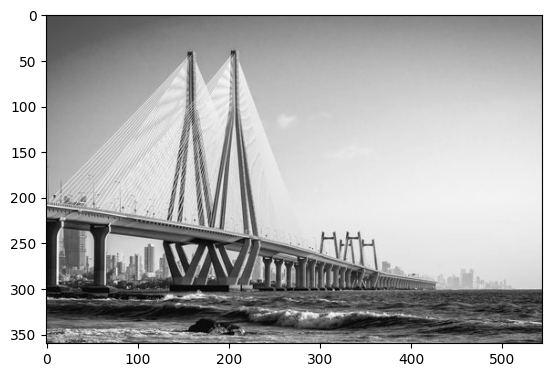

In [10]:
import cv2 
image = cv2.imread('sea_link.jpg', 0) 
plt.imshow(image, cmap='gray')

In [13]:
def butterworth_lowpass_filter(image, cutoff_frequency, order):
    # Convert image to frequency domain
    image_fft = fftshift(fft2(image))
    
    # Create butterworth filter mask
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    x = np.linspace(-center_col, center_col - 1, cols)
    y = np.linspace(-center_row, center_row - 1, rows)
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt(X**2 + Y**2)
    filter_mask = 1 / (1 + (distance / cutoff_frequency)**(2 * order))
    
    # Apply filter in the frequency domain
    filtered_image_fft = image_fft * filter_mask
    
    # Convert back to spatial domain
    filtered_image = np.real(ifft2(ifftshift(filtered_image_fft)))

    return filtered_image

In [14]:
def butterworth_highpass_filter(image, cutoff_frequency, order):
    # Convert image to frequency domain
    image_fft = fftshift(fft2(image))
    
    # Create butterworth filter mask
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    x = np.linspace(-center_col, center_col - 1, cols)
    y = np.linspace(-center_row, center_row - 1, rows)
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt(X**2 + Y**2)
    filter_mask = 1 / (1 + (cutoff_frequency / distance)**(2 * order))
    
    # Apply filter in the frequency domain
    filtered_image_fft = image_fft * filter_mask
    
    # Convert back to spatial domain
    filtered_image = np.real(ifft2(ifftshift(filtered_image_fft)))
    
    return filtered_image

In [15]:
cutoff_frequency = 10  # Adjust this value according to your requirements
order = 2  # Adjust this value according to your requirements

In [16]:
# Apply Butterworth low-pass filter
filtered_image_lowpass = butterworth_lowpass_filter(image, cutoff_frequency, order)

In [17]:
# Apply Butterworth high-pass filter
filtered_image_highpass = butterworth_highpass_filter(image, cutoff_frequency, order)

<ipython-input-14-1455f02f44bb>:12: RuntimeWarning: divide by zero encountered in true_divide
  filter_mask = 1 / (1 + (cutoff_frequency / distance)**(2 * order))


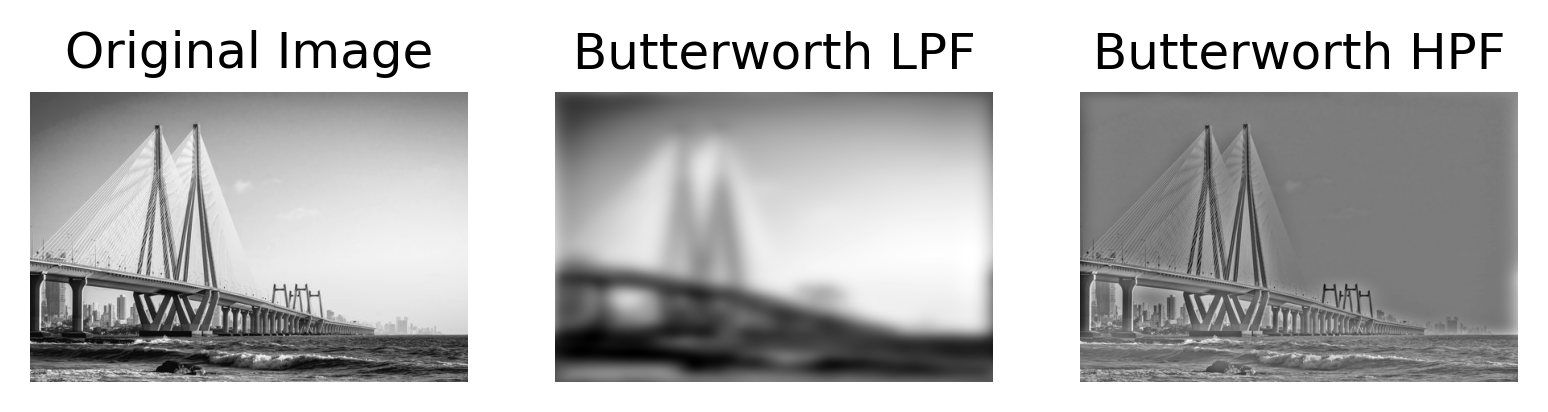

In [20]:
# Display the original and filtered images
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(filtered_image_lowpass, cmap='gray')
plt.title('Butterworth LPF')
plt.axis('off')

fig.add_subplot(1,3, 3)
plt.imshow(filtered_image_highpass, cmap='gray')
plt.title('Butterworth HPF')
plt.axis('off')
plt.show()